# Training Deep Neural Networks

## Vanishing/Exploding Gradient Problem

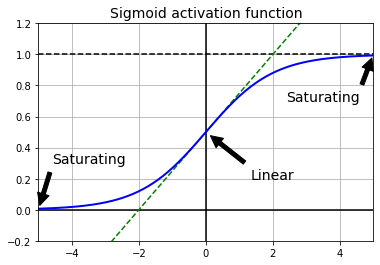

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def logit(z):
    return 1 / (1 + np.exp(-z))

# Define the input space
z = np.linspace(-5, 5, 200)

# Plot the Logit activation function (Sigmoid)
plt.plot([-5, 5], [0, 0], "k-")
plt.plot([-5, 5], [1, 1], "k--")
plt.plot([0, 0], [-0.2, 1.2], "k-")

plt.plot([-5, 5], [-3/4, 7/4], "g--")
plt.plot(z, logit(z), "b-", linewidth=2)

props = dict(facecolor='black', shrink=0.1)
plt.annotate('Saturating', xytext=(3.5, 0.7), xy=(5, 1), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Saturating', xytext=(-3.5, 0.3), xy=(-5, 0), arrowprops=props, fontsize=14, ha="center")
plt.annotate('Linear', xytext=(2, 0.2), xy=(0, 0.5), arrowprops=props, fontsize=14, ha="center")

plt.grid(True)
plt.title("Sigmoid activation function", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

plt.show()

### Xavier and He Initialization

In [2]:
import tensorflow as tf
from tensorflow import keras

[name for name in dir(keras.initializers) if not name.startswith("_")]

['Constant',
 'GlorotNormal',
 'GlorotUniform',
 'HeNormal',
 'HeUniform',
 'Identity',
 'Initializer',
 'LecunNormal',
 'LecunUniform',
 'Ones',
 'Orthogonal',
 'RandomNormal',
 'RandomUniform',
 'TruncatedNormal',
 'VarianceScaling',
 'Zeros',
 'constant',
 'deserialize',
 'get',
 'glorot_normal',
 'glorot_uniform',
 'he_normal',
 'he_uniform',
 'identity',
 'lecun_normal',
 'lecun_uniform',
 'ones',
 'orthogonal',
 'random_normal',
 'random_uniform',
 'serialize',
 'truncated_normal',
 'variance_scaling',
 'zeros']

In [3]:
# Layer with ReLU activation and He normal initialization
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [4]:
# The default mode for this initialization is `fan_in`
#  - to switch to `fan_avg` one has to use `VarianceScaling`
init = keras.initializers.VarianceScaling(scale=2., mode="fan_avg", distribution="uniform")
keras.layers.Dense(10, activation="relu", kernel_initializer=init)

### Nonsaturating Activation Functions

#### Leaky ReLU
$\text{LeakyReLU}_\alpha(z) = \max(\alpha z, z)$

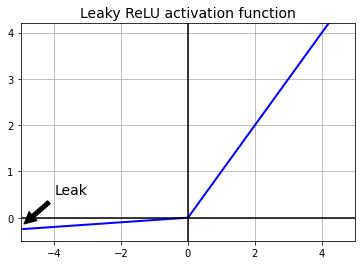

In [5]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(alpha*z, z)

# Plot the LeakyReLU activation function
plt.plot(z, leaky_relu(z, 0.05), "b-", linewidth=2)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([0, 0], [-0.5, 4.2], 'k-')

plt.grid(True)
props = dict(facecolor='black', shrink=0.1)
plt.annotate('Leak', xytext=(-3.5, 0.5), xy=(-5, -0.2), arrowprops=props, fontsize=14, ha="center")
plt.title("Leaky ReLU activation function", fontsize=14)
plt.axis([-5, 5, -0.5, 4.2])

plt.show()

In [6]:
[m for m in dir(keras.activations) if not m.startswith("_")]

['deserialize',
 'elu',
 'exponential',
 'gelu',
 'get',
 'hard_sigmoid',
 'linear',
 'relu',
 'selu',
 'serialize',
 'sigmoid',
 'softmax',
 'softplus',
 'softsign',
 'swish',
 'tanh']

In [7]:
[m for m in dir(keras.layers) if "relu" in m.lower()]

['LeakyReLU', 'PReLU', 'ReLU', 'ThresholdedReLU']

In [8]:
# Load, split and scale the Fashion MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
max_value = 255.0
val_split = 5000
X_train_full = X_train_full / max_value
X_test = X_test / max_value
X_valid, X_train = X_train_full[:val_split], X_train_full[val_split:]
y_valid, y_train = y_train_full[:val_split], y_train_full[val_split:]

# Set RNG state
tf.random.set_seed(42)
np.random.seed(42)

# Build a model with LeakyReLU activations and He normal initialization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"],
)

# Train and validate the model for 10 epochs
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.6314 - accuracy: 0.5054 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8416 - accuracy: 0.7246 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7053 - accuracy: 0.7637 - val_loss: 0.6427 - val_accuracy: 0.7900
Epoch 4/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.6325 - accuracy: 0.7908 - val_loss: 0.5900 - val_accuracy: 0.8066
Epoch 5/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5992 - accuracy: 0.8019 - val_loss: 0.5582 - val_accuracy: 0.8202
Epoch 6/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5624 - accuracy: 0.8141 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/10
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5379 - accuracy: 0.8218 - val_loss: 0.5157 - val_accuracy:

#### PReLU

In [9]:
# Reset the RNG state
tf.random.set_seed(42)
np.random.seed(42)

# Build the same model but with PReLU activation
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"],
)

# Train the model for 10 epochs
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 1.6969 - accuracy: 0.4974 - val_loss: 0.9255 - val_accuracy: 0.7186
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8706 - accuracy: 0.7247 - val_loss: 0.7305 - val_accuracy: 0.7632
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7211 - accuracy: 0.7620 - val_loss: 0.6565 - val_accuracy: 0.7878
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6448 - accuracy: 0.7880 - val_loss: 0.6004 - val_accuracy: 0.8046
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6078 - accuracy: 0.8003 - val_loss: 0.5656 - val_accuracy: 0.8180
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5693 - accuracy: 0.8119 - val_loss: 0.5407 - val_accuracy: 0.8240
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5428 - accuracy: 0.8193 - val_loss: 0.5196 - val_accuracy:

#### ELU

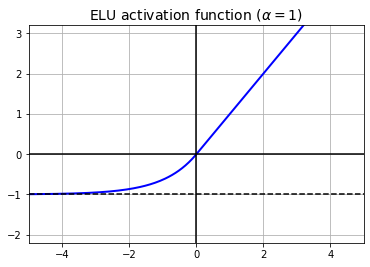

In [10]:
def elu(z, alpha=1):
    return np.where(z < 0, alpha * (np.exp(z) - 1), z)

# Plot the ELU activation function
plt.plot(z, elu(z), "b-", linewidth=2)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1, -1], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')

plt.grid(True)
plt.title(r"ELU activation function ($\alpha=1$)", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

#### SELU

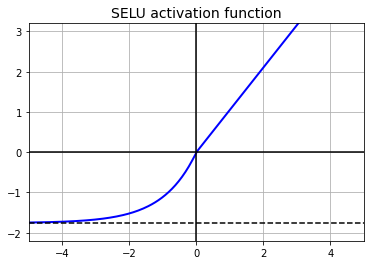

In [11]:
from scipy.special import erfc

# alpha and scale to self normalize with mean 0 and standard deviation 1
# (see equation 14 in the paper):
alpha_0_1 = -np.sqrt(2 / np.pi) / (erfc(1/np.sqrt(2)) * np.exp(1/2) - 1)
scale_0_1 = (1 - erfc(1 / np.sqrt(2)) * np.sqrt(np.e)) * np.sqrt(2 * np.pi) * (2 * erfc(np.sqrt(2))*np.e**2 + np.pi*erfc(1/np.sqrt(2))**2*np.e - 2*(2+np.pi)*erfc(1/np.sqrt(2))*np.sqrt(np.e)+np.pi+2)**(-1/2)

def selu(z, scale=scale_0_1, alpha=alpha_0_1):
    return scale * elu(z, alpha)

# Plot the SELU activation function
plt.plot(z, selu(z), "b-", linewidth=2)

plt.plot([-5, 5], [0, 0], 'k-')
plt.plot([-5, 5], [-1.758, -1.758], 'k--')
plt.plot([0, 0], [-2.2, 3.2], 'k-')

plt.grid(True)
plt.title("SELU activation function", fontsize=14)
plt.axis([-5, 5, -2.2, 3.2])

plt.show()

In [12]:
# Reset the numpy RNG
np.random.seed(42)

# Standardized inputs
Z = np.random.normal(size=(500, 100))

# Stack of 1k dense layers
for layer in range(1000):
    # LeCun initialization
    W = np.random.normal(size=(100, 100), scale=np.sqrt(1 / 100))
    Z = selu(np.dot(Z, W))
    means = np.mean(Z, axis=0).mean()
    stds = np.std(Z, axis=0).mean()
    if layer % 100 == 0:
        print("Layer {}: mean {:.2f}, std deviation {:.2f}".format(layer, means, stds))

Layer 0: mean -0.00, std deviation 1.00
Layer 100: mean 0.02, std deviation 0.96
Layer 200: mean 0.01, std deviation 0.90
Layer 300: mean -0.02, std deviation 0.92
Layer 400: mean 0.05, std deviation 0.89
Layer 500: mean 0.01, std deviation 0.93
Layer 600: mean 0.02, std deviation 0.92
Layer 700: mean -0.02, std deviation 0.90
Layer 800: mean 0.05, std deviation 0.83
Layer 900: mean 0.02, std deviation 1.00


In [13]:
keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")

In [14]:
# Reset the RNG state
np.random.seed(42)
tf.random.set_seed(42)

# Build a 100 layer DNN with SELU activation and LeCun initialization
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"],
)

# Scale the Fashion MNIST inputs to mean 0 and std 1
pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

# Train the model for 5 epochs
history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 27s 14ms/step - loss: 1.3414 - accuracy: 0.4814 - val_loss: 0.7377 - val_accuracy: 0.7502
Epoch 2/5
1719/1719 [==============================] - 23s 13ms/step - loss: 0.7292 - accuracy: 0.7406 - val_loss: 0.5861 - val_accuracy: 0.7832
Epoch 3/5
1719/1719 [==============================] - 23s 13ms/step - loss: 0.5890 - accuracy: 0.7893 - val_loss: 0.6003 - val_accuracy: 0.7920
Epoch 4/5
1719/1719 [==============================] - 23s 13ms/step - loss: 0.5440 - accuracy: 0.8130 - val_loss: 0.4992 - val_accuracy: 0.8310
Epoch 5/5
1719/1719 [==============================] - 24s 14ms/step - loss: 0.5055 - accuracy: 0.8239 - val_loss: 0.4923 - val_accuracy: 0.8300


In [15]:
# Reset the RNG state
np.random.seed(42)
tf.random.set_seed(42)

# Build the same model but with ReLU activation for comparison
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu", kernel_initializer="he_normal"))
for layer in range(99):
    model.add(keras.layers.Dense(100, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"],
)

history = model.fit(X_train_scaled, y_train, epochs=5, validation_data=(X_valid_scaled, y_valid))

Epoch 1/5
1719/1719 [==============================] - 26s 14ms/step - loss: 2.0605 - accuracy: 0.1875 - val_loss: 1.2408 - val_accuracy: 0.4554
Epoch 2/5
1719/1719 [==============================] - 24s 14ms/step - loss: 1.2370 - accuracy: 0.4725 - val_loss: 0.9193 - val_accuracy: 0.5934
Epoch 3/5
1719/1719 [==============================] - 21s 12ms/step - loss: 0.9940 - accuracy: 0.5775 - val_loss: 1.1140 - val_accuracy: 0.5152
Epoch 4/5
1719/1719 [==============================] - 20s 11ms/step - loss: 0.9765 - accuracy: 0.5971 - val_loss: 0.7640 - val_accuracy: 0.7128
Epoch 5/5
1719/1719 [==============================] - 20s 11ms/step - loss: 0.7494 - accuracy: 0.7122 - val_loss: 0.7422 - val_accuracy: 0.7186


## Batch Normalization
The problem that *batch normalization* addresses is to prevent gradient from vanishing/exploding even during training, i.e. not just initialization. The idea is to keep layer inputs zero-centered and normalized by adding an extra operation before or after activation function. The algorithm is following:
1. $\mathbf{\mu}_B = \frac{1}{m_B}\sum_{i = 1}^{m_B} \mathbf{x}^{(i)}$ .................... $\mathbf{\mu}_B$ is the a of input means evaluated over the whole mini-batch $B$ containing $m_B$ instances
1. $\mathbf{\sigma}_B^2 = \frac{1}{m_B}\sum_{i = 1}^{m_B} (\mathbf{x}^{(i)} - \mathbf{\mu}_B)^2$ ..... $\mathbf{\sigma}_B$ is a vector of input standard deviations
1. $\hat{\mathbf{x}}^{(i)} = \frac{\mathbf{x}^{(i)} - \mathbf{\mu}_B}{\sqrt{\mathbf{\sigma}_B^2 + \epsilon}}$ ............................... $\hat{\mathbf{x}}^{(i)}$ is a vector of zero-centered and normalized inputs for instance $i$ where $\epsilon$ is a *smootning term* (a small number preventing division by zero)
1. $\mathbf{z}^{(i)} = \mathbf{\gamma} \otimes \hat{\mathbf{x}}^{(i)} + \mathbf{\beta}$ ...................... $\mathbf{z}^{(i)}$ is the output of BN operation, it is a rescaled and shifted version of the inputs where $\mathbf{\gamma}$ ($\mathbf{\beta}$) is a scaling (shift/offset) parameter of the layer and $\otimes$ is element-wise multiplication

Wheat remains is to answer how to normalize test instances which are applied one after another (there are no batches, moreover test instances may not be *iid*, so computing any reliable statistic is not possible). In other words what is the final $\mathbf{\mu}_B$ and $\mathbf{\sigma}_B^2$ ($\mathbf{\gamma}$ and $\mathbf{\beta}$ are learned during trainging as additional parameters)? There are two options - the latter is typically implemented (e.g. by Keras):
1. Run the whole training set through the network again after training to compute the instance means and std
1. Estimate these during traingin as exponential moving averages: $\hat{\mathbf{v}} \gets \text{momentum} \times \hat{\mathbf{v}} + (1 - \text{momentum}) \times \mathbf{v}$ where *momentum* is a BN hyper-parameter, $\hat{\mathbf{v}}$ is the exp. moving avg. and $\mathbf{v}$ are current batch means

In [16]:
# Build a sequential model with batch normalization
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

# Show model structure
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_211 (Dense)            (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_212 (Dense)            (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_213 (Dense)            (None, 10)               

In [17]:
bn1 = model.layers[1]
for var in bn1.variables:
    print(f"Trainable: {var.trainable}\tName: {var.name}")

Trainable: True	Name: batch_normalization/gamma:0
Trainable: True	Name: batch_normalization/beta:0
Trainable: False	Name: batch_normalization/moving_mean:0
Trainable: False	Name: batch_normalization/moving_variance:0


In [18]:
# Compile and train the model for 10 epochs

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"],
)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.2287 - accuracy: 0.5993 - val_loss: 0.5526 - val_accuracy: 0.8230
Epoch 2/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5996 - accuracy: 0.7960 - val_loss: 0.4726 - val_accuracy: 0.8470
Epoch 3/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5312 - accuracy: 0.8170 - val_loss: 0.4376 - val_accuracy: 0.8546
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4884 - accuracy: 0.8293 - val_loss: 0.4153 - val_accuracy: 0.8600
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4718 - accuracy: 0.8344 - val_loss: 0.3997 - val_accuracy: 0.8644
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4419 - accuracy: 0.8459 - val_loss: 0.3867 - val_accuracy: 0.8692
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4286 - accuracy: 0.8496 - val_loss: 0.3764 - val_accuracy:

Sometimes applying BN before the activation function works better. One advantage of doing so is that the batch-normalized layer does not need a bias term and we can save some parameters.

In [19]:
# Build and train a batch-normalized model
#  - normalization is used before activation and biases are switched off
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"],
)

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 10s 5ms/step - loss: 1.3677 - accuracy: 0.5605 - val_loss: 0.6767 - val_accuracy: 0.7812
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7135 - accuracy: 0.7703 - val_loss: 0.5566 - val_accuracy: 0.8186
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6123 - accuracy: 0.7991 - val_loss: 0.5007 - val_accuracy: 0.8364
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5547 - accuracy: 0.8148 - val_loss: 0.4666 - val_accuracy: 0.8450
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.5254 - accuracy: 0.8232 - val_loss: 0.4434 - val_accuracy: 0.8536
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4947 - accuracy: 0.8325 - val_loss: 0.4263 - val_accuracy: 0.8548
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4736 - accuracy: 0.8387 - val_loss: 0.4131 - val_accurac

### Gradient Clipping
This technique is most often used for RNNs where using BN is quite tricky. Gradient clipping can be set for an optimizer by one of two parameters:
* `clipvalue` - simply clips values to fit in given bounds
* `clipnorm` - preserves gradient direction by using $\ell_2$ norm instead (but while doing this it can produce values close to 0)

Following will transform gradient values $[0.9, 100.0] \to [0.9, 1.0]$.

In [20]:
optimizer = keras.optimizers.SGD(clipvalue=1.0)

While using the norm will produce $[0.9, 100.0] \to [0.00899964, 0.9999595]$ (notice that first component is very close to zero so this option does not really help with the vanishing gradient).

In [21]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

### Reusing Pretrained Layers

#### Reusing a Keras model
Let's take a Fashion MNIST dataset and pretend there's an existing pre-trained model that can classify images to all but two classes. Out task is to classify images to these two classes (sandals and shirts).

This example is fine-tuned in the stype of *torturing the data until it confesses*, typically *transfer learning* does not work for shallow and wide nets because the patterns learned in lower layers are not general enough. On the contrary, it works pretty well for deep convolutional networks.

In [22]:
import os

# Reset RNG state
tf.random.set_seed(42)
np.random.seed(42)

# Split the dataset into
# A - data that our pre-trained model is trained on (not containing sandals and shirts)
# B - small dataset for our taks (containing sandals and shirts)

sandals_class, shirts_class = 5, 6

def split_dataset(X, y):
    # sandals or shirts
    y_sandals_or_shirts = (y == sandals_class) | (y == shirts_class)
    y_A = y[~y_sandals_or_shirts]
    # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_A[y_A > shirts_class] -= 2
    # binary classification task: is it a shirt (class 6)?
    y_B = (y[y_sandals_or_shirts] == shirts_class).astype(np.float32)
    return (X[~y_sandals_or_shirts], y_A), (X[y_sandals_or_shirts], y_B)

# Split the data into training, validation and test sets for tasks A and B
(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)

# Sub-select a small dataset for taks B (sandals and shirts)
dataset_size = 200
X_train_B = X_train_B[:dataset_size]
y_train_B = y_train_B[:dataset_size]


# Build and pre-train and save model A
model_A_path = os.path.join("data", "my_model_A.h5")

model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"],
)

history = model_A.fit(X_train_A, y_train_A, epochs=20, validation_data=(X_valid_A, y_valid_A))
model_A.save(model_A_path)

Epoch 1/20
1375/1375 [==============================] - 4s 3ms/step - loss: 0.9249 - accuracy: 0.6994 - val_loss: 0.3896 - val_accuracy: 0.8662
Epoch 2/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3651 - accuracy: 0.8745 - val_loss: 0.3286 - val_accuracy: 0.8832
Epoch 3/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3182 - accuracy: 0.8894 - val_loss: 0.3014 - val_accuracy: 0.8986
Epoch 4/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.3048 - accuracy: 0.8956 - val_loss: 0.2896 - val_accuracy: 0.9016
Epoch 5/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2804 - accuracy: 0.9029 - val_loss: 0.2777 - val_accuracy: 0.9066
Epoch 6/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2701 - accuracy: 0.9077 - val_loss: 0.2735 - val_accuracy: 0.9068
Epoch 7/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.2627 - accuracy: 0.9094 - val_loss: 0.2716 - val_accuracy:

In [23]:
# Next let's use the same architecture for taks B
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.SGD(lr=1e-3),
    metrics=["accuracy"],
)

# Train this model on just 200 instances for task B
history = model_B.fit(X_train_B, y_train_B, epochs=20, validation_data=(X_valid_B, y_valid_B))

# Evaluate model B on the test set
_, acc_B = model_B.evaluate(X_test_B, y_test_B)

Epoch 1/20
7/7 [==============================] - 1s 40ms/step - loss: 1.0360 - accuracy: 0.4975 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 15ms/step - loss: 0.5883 - accuracy: 0.6971 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 14ms/step - loss: 0.4380 - accuracy: 0.8854 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 13ms/step - loss: 0.4021 - accuracy: 0.8712 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 14ms/step - loss: 0.3361 - accuracy: 0.9348 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 14ms/step - loss: 0.3113 - accuracy: 0.9233 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 14ms/step - loss: 0.2817 - accuracy: 0.9299 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

Next let's try to reuse model A for task B. One can either directly link model A's layers and weights (`model.layers[:-1]`) to model B or clone model A (and it's weights) to make an independent model B like so
```python
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())
```

In [24]:
def transfer_learn(pretrained_model, X_train, X_valid, y_train, y_valid, epochs_init=4, epochs_train=16, lr_init=1e-3, lr_train=1e-3):
    # Reuse all but output layers and and new output for this task
    reused_layers = pretrained_model.layers[:-1]
    model = keras.models.Sequential(reused_layers)
    model.add(keras.layers.Dense(1, activation="sigmoid"))
    
    # Freeze weights of reused layers' weights for first couple of epochs
    for layer in reused_layers:
        layer.trainable = False
     
    # Model must be re-compiled each time we modify layers
    model.compile(
        loss="binary_crossentropy",
        optimizer=keras.optimizers.SGD(lr=lr_init),
        metrics=["accuracy"],
    )
    
    # Short initial training with weights reused layers being locked to learn reasonable weights for the output
    history = model.fit(X_train, y_train, epochs=epochs_init, validation_data=(X_valid, y_valid))
    
    # Unlock all weights
    for layer in reused_layers:
        layer.trainable = True
        
    # Recompile the model - use small learning rate so the reused weights are not completely destroyed
    model.compile(
        loss="binary_crossentropy",
        optimizer=keras.optimizers.SGD(lr=lr_train),
        metrics=["accuracy"],
    )

    history = model.fit(X_train, y_train, epochs=epochs_train, validation_data=(X_valid, y_valid))
    return model


# Load pre-trained model for task A
model_A = keras.models.load_model(model_A_path)

# Transfer-learn model for task B
model_B = transfer_learn(model_A, X_train_B, X_valid_B, y_train_B, y_valid_B)

# Evaluate new model B on the test set
_, acc_B_tl = model_B.evaluate(X_test_B, y_test_B)

# Display error rate imrovement
acc_improvement = (100 - acc_B) / (100 - acc_B_tl)
acc_improvement

Epoch 1/4
7/7 [==============================] - 1s 42ms/step - loss: 0.6135 - accuracy: 0.6184 - val_loss: 0.5822 - val_accuracy: 0.6359
Epoch 2/4
7/7 [==============================] - 0s 16ms/step - loss: 0.5530 - accuracy: 0.6638 - val_loss: 0.5449 - val_accuracy: 0.6805
Epoch 3/4
7/7 [==============================] - 0s 15ms/step - loss: 0.4874 - accuracy: 0.7531 - val_loss: 0.5129 - val_accuracy: 0.7099
Epoch 4/4
7/7 [==============================] - 0s 14ms/step - loss: 0.4878 - accuracy: 0.7405 - val_loss: 0.4843 - val_accuracy: 0.7333
Epoch 1/16
7/7 [==============================] - 1s 42ms/step - loss: 0.4367 - accuracy: 0.7823 - val_loss: 0.3452 - val_accuracy: 0.8641
Epoch 2/16
7/7 [==============================] - 0s 15ms/step - loss: 0.2963 - accuracy: 0.9143 - val_loss: 0.2599 - val_accuracy: 0.9300
Epoch 3/16
7/7 [==============================] - 0s 14ms/step - loss: 0.2029 - accuracy: 0.9777 - val_loss: 0.2108 - val_accuracy: 0.9554
Epoch 4/16
7/7 [===============

1.0002272564418244

## Faster Optimizers

### Momentum optimization
```python
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9)
```

### Nesterov Accelerated Gradient
```python
optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.9, nesterov=True)
```

### AdaGrad
```python
optimizer = keras.optimizers.Adagrad(lr=0.001)
```

### RMSProp
```python
optimizer = keras.optimizers.RMSprop(lr=0.001, rho=0.9)
```

### Adam Optimization
```python
optimizer = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
```

### Adamax Optimization
```python
optimizer = keras.optimizers.Adamax(lr=0.001, beta_1=0.9, beta_2=0.999)
```

### Nadam Optimization
```python
optimizer = keras.optimizers.Nadam(lr=0.001, beta_1=0.9, beta_2=0.999)
```